In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
df1 = pd.read_csv("roty.csv")

In [3]:
df2 = pd.read_csv("NBA_Rookies_by_Year.csv")

In [4]:
df2.head()

index             Name  Year Drafted    GP   MIN   PTS  FGM   FGA   FG%  \
0      0   Brandon Ingram        2016.0  36.0  27.4   7.4  2.6   7.6  34.7   
1      1  Andrew Harrison        2016.0  35.0  26.9   7.2  2.0   6.7  29.6   
2      2  Rodney McGruder        2016.0  30.0  25.7   5.8  2.1   5.3  40.0   
3      3      Joel Embiid        2016.0  22.0  24.8  18.9  6.2  13.4  46.4   
4      4      Dario Saric        2016.0  32.0  24.1   9.5  3.5   9.0  38.7   

   3P Made  ...  FTA   FT%  OREB  DREB  REB  AST  STL  BLK  TOV   EFF  
0      0.5  ...  2.3  69.9   0.7   3.4  4.1  1.9  0.4  0.4  1.3   7.3  
1      0.7  ...  3.4  76.5   0.5   2.0  2.4  3.7  1.1  0.5  1.6   7.9  
2      0.8  ...  1.0  72.4   1.5   2.0  3.5  1.5  0.7  0.3  0.7   7.5  
3      1.2  ...  6.8  77.3   2.0   5.4  7.3  1.9  0.8  2.4  3.8  18.8  
4      1.3  ...  1.7  77.4   1.2   4.7  5.9  1.7  0.5  0.2  1.8  10.1  

[5 rows x 23 columns]

In [5]:
df1.head()

Player Name  Year
0   Oscar Robertson  1961
1  Wilt Chamberlain  1960
2      Walt Bellamy  1962
3  Terry Dischinger  1963
4       Jerry Lucas  1964

In [6]:
df1["roy"]=1

In [7]:
df3 = pd.merge(df2,df1, how="left", left_on="Name", right_on="Player Name")

In [8]:
df3.head()

index             Name  Year Drafted    GP   MIN   PTS  FGM   FGA   FG%  \
0      0   Brandon Ingram        2016.0  36.0  27.4   7.4  2.6   7.6  34.7   
1      1  Andrew Harrison        2016.0  35.0  26.9   7.2  2.0   6.7  29.6   
2      2  Rodney McGruder        2016.0  30.0  25.7   5.8  2.1   5.3  40.0   
3      3      Joel Embiid        2016.0  22.0  24.8  18.9  6.2  13.4  46.4   
4      4      Dario Saric        2016.0  32.0  24.1   9.5  3.5   9.0  38.7   

   3P Made  ...  DREB  REB  AST  STL  BLK  TOV   EFF  Player Name  Year  roy  
0      0.5  ...   3.4  4.1  1.9  0.4  0.4  1.3   7.3          NaN   NaN  NaN  
1      0.7  ...   2.0  2.4  3.7  1.1  0.5  1.6   7.9          NaN   NaN  NaN  
2      0.8  ...   2.0  3.5  1.5  0.7  0.3  0.7   7.5          NaN   NaN  NaN  
3      1.2  ...   5.4  7.3  1.9  0.8  2.4  3.8  18.8          NaN   NaN  NaN  
4      1.3  ...   4.7  5.9  1.7  0.5  0.2  1.8  10.1          NaN   NaN  NaN  

[5 rows x 26 columns]

In [9]:
#2003 year missing

In [10]:
df3["roy"]=df3.roy.fillna(0)

In [11]:
df3.head()

index             Name  Year Drafted    GP   MIN   PTS  FGM   FGA   FG%  \
0      0   Brandon Ingram        2016.0  36.0  27.4   7.4  2.6   7.6  34.7   
1      1  Andrew Harrison        2016.0  35.0  26.9   7.2  2.0   6.7  29.6   
2      2  Rodney McGruder        2016.0  30.0  25.7   5.8  2.1   5.3  40.0   
3      3      Joel Embiid        2016.0  22.0  24.8  18.9  6.2  13.4  46.4   
4      4      Dario Saric        2016.0  32.0  24.1   9.5  3.5   9.0  38.7   

   3P Made  ...  DREB  REB  AST  STL  BLK  TOV   EFF  Player Name  Year  roy  
0      0.5  ...   3.4  4.1  1.9  0.4  0.4  1.3   7.3          NaN   NaN  0.0  
1      0.7  ...   2.0  2.4  3.7  1.1  0.5  1.6   7.9          NaN   NaN  0.0  
2      0.8  ...   2.0  3.5  1.5  0.7  0.3  0.7   7.5          NaN   NaN  0.0  
3      1.2  ...   5.4  7.3  1.9  0.8  2.4  3.8  18.8          NaN   NaN  0.0  
4      1.3  ...   4.7  5.9  1.7  0.5  0.2  1.8  10.1          NaN   NaN  0.0  

[5 rows x 26 columns]

In [12]:
df3.columns

Index(['index', 'Name', 'Year Drafted', 'GP', 'MIN', 'PTS', 'FGM', 'FGA',
       'FG%', '3P Made', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB',
       'REB', 'AST', 'STL', 'BLK', 'TOV', 'EFF', 'Player Name', 'Year', 'roy'],
      dtype='object')

In [13]:
model_dat=df3[["GP", "MIN", 'PTS', 'FGM', 'FGA',
       'FG%', '3P Made', '3PA', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB',
       'REB', 'AST', 'STL', 'BLK', 'TOV', 'EFF', 'roy']]

In [14]:
model_dat.dropna(inplace=True)

C:\Users\DradenB\AppData\Local\Temp\ipykernel_17084\3612881861.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model_dat.dropna(inplace=True)


In [15]:
X = model_dat.drop(["roy"], axis=1)

In [16]:
y = model_dat[["roy"]]

In [17]:

from sklearn.preprocessing import StandardScaler


# Creating the data frame
details = {
	'col1': [1, 3, 5, 7, 9],
	'col2': [7, 4, 35, 14, 56]
}

# creating a Dataframe object
df = pd.DataFrame(details)

# define standard scaler
scaler = StandardScaler()

# transform data
df = scaler.fit_transform(df)


In [18]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
# Create the linear regression object
model = LinearRegression()

# Split the data into independent (X) and dependent (y) variables
X = model_dat.drop(["roy"], axis=1)
scaler=StandardScaler()
X = scaler.fit_transform(X)
y = model_dat[["roy"]]

# Fit the model to the data
model.fit(X, y)

# Print the model coefficients
print(model.coef_)
print(model.intercept_)


[[-0.01283706 -0.08682581  0.03050388 -0.05404569  0.04563366 -0.03355874
  -0.01223664 -0.00213683 -0.07173947  0.07841877 -0.0131129  -0.04436362
   0.02189355 -0.06259982 -0.01408369 -0.03569355 -0.01946933 -0.01452214
   0.26879634]]
[0.02340702]


In [19]:
# as eff increases probablity of roty goes up

In [73]:
model_dat.head(25)

GP   MIN   PTS  FGM   FGA   FG%  3P Made  3PA  FTM  FTA   FT%  OREB  \
0   36.0  27.4   7.4  2.6   7.6  34.7      0.5  2.1  1.6  2.3  69.9   0.7   
1   35.0  26.9   7.2  2.0   6.7  29.6      0.7  2.8  2.6  3.4  76.5   0.5   
2   30.0  25.7   5.8  2.1   5.3  40.0      0.8  2.6  0.7  1.0  72.4   1.5   
3   22.0  24.8  18.9  6.2  13.4  46.4      1.2  3.0  5.3  6.8  77.3   2.0   
4   32.0  24.1   9.5  3.5   9.0  38.7      1.3  3.6  1.3  1.7  77.4   1.2   
5   32.0  22.9   8.3  3.2   6.9  46.2      0.9  2.1  0.9  1.1  85.7   0.4   
6   33.0  22.8   5.2  1.9   4.6  40.5      0.9  2.8  0.6  0.8  76.0   0.7   
7   25.0  22.6   6.7  2.6   6.4  41.3      0.5  1.8  0.9  1.2  76.7   0.2   
8   34.0  21.1   6.4  2.6   6.0  43.9      1.0  2.4  0.1  0.2  57.1   0.5   
9   33.0  20.7   8.4  3.0   7.9  37.8      1.4  4.1  1.0  1.3  81.0   0.6   
10  35.0  19.3   8.6  3.3   8.4  39.5      1.5  4.1  0.5  0.6  90.5   0.3   
11  32.0  17.8   5.1  2.3   4.3  52.5      0.0  0.1  0.5  0.7  77.3   1.3   
12  24.0  17.4   5.3  2.1   5.1  41.8      0.4  1.7  0.6  1.0  60.0   0.3   
13  34.0  17.1   7.0  2.7   6.3  42.7      0.6  2.1  1.0  1.7  59.6   1.1   
14  33.0  16.9   4.1  1.5   4.1  37.3      0.3  0.9  0.8  1.2  62.5   0.4   
15  33.0  16.4   5.3  2.0   5.3  37.1      0.2  1.4  1.1  1.3  86.0   0.2   
16  33.0  15.6   3.0  1.3   4.0  31.8      0.2  1.1  0.3  0.5  52.9   0.4   
17  12.0  15.5   4.7  1.6   4.4  35.8      0.8  2.6  0.7  1.0  66.7   0.3   
18  23.0  14.7   3.1  1.3   3.2  39.7      0.1  0.8  0.5  0.7  64.7   0.4   
19  11.0  13.7   4.8  1.5   3.7  41.5      0.3  1.4  1.5  1.6  88.9   0.2   
20  27.0  13.7   5.6  1.9   4.9  37.9      1.3  3.6  0.7  0.7  90.0   0.3   
21  28.0  13.6   5.5  2.3   4.1  56.0      0.1  0.2  0.8  1.1  71.9   1.5   
22  22.0  13.5   3.5  1.2   3.8  31.3      0.1  0.8  1.0  1.3  82.1   0.3   
23  34.0  13.4   4.9  1.9   4.4  44.6      0.4  1.1  0.7  1.1  63.2   0.6   
24  27.0  12.4   3.3  1.3   3.2  40.7      0.7  2.1  0.0  0.2  16.7   0.3   

    DREB  REB  AST  STL  BLK  TOV   EFF  roy  
0    3.4  4.1  1.9  0.4  0.4  1.3   7.3  0.0  
1    2.0  2.4  3.7  1.1  0.5  1.6   7.9  0.0  
2    2.0  3.5  1.5  0.7  0.3  0.7   7.5  0.0  
3    5.4  7.3  1.9  0.8  2.4  3.8  18.8  0.0  
4    4.7  5.9  1.7  0.5  0.2  1.8  10.1  0.0  
5    2.1  2.5  3.6  1.0  0.1  1.5  10.1  1.0  
6    2.2  2.8  1.0  0.6  0.3  0.7   6.3  0.0  
7    2.0  2.2  3.0  0.7  0.5  2.2   6.9  0.0  
8    3.1  3.6  1.3  0.6  0.5  1.1   7.7  0.0  
9    2.1  2.7  1.8  0.5  0.3  1.3   7.3  0.0  
10   2.2  2.5  1.2  0.3  0.1  0.9   6.7  0.0  
11   2.2  3.5  0.4  0.5  0.8  0.7   7.4  0.0  
12   1.6  1.8  0.8  1.0  0.4  1.1   4.8  0.0  
13   2.2  3.3  0.5  0.5  0.5  1.2   6.2  0.0  
14   1.9  2.2  2.4  1.0  0.3  1.2   5.8  0.0  
15   1.5  1.6  2.8  0.4  0.0  1.5   5.1  0.0  
16   1.0  1.4  2.5  0.4  0.1  0.7   3.7  0.0  
17   2.3  2.6  1.3  0.9  0.2  0.6   5.9  0.0  
18   1.1  1.5  2.2  0.5  0.0  0.9   4.2  0.0  
19   0.7  0.9  0.8  0.5  0.1  0.2   4.5  0.0  
20   0.9  1.2  0.4  0.4  0.1  0.6   3.9  0.0  
21   3.2  4.7  0.8  0.3  0.5  1.2   8.5  0.0  
22   1.1  1.5  2.1  0.6  0.3  1.3   3.8  0.0  
23   1.2  1.8  0.6  0.3  0.3  0.6   4.6  0.0  
24   1.8  2.0  0.4  0.3  0.5  0.7   3.8  0.0

In [21]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2014 entries, 0 to 2013
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         2014 non-null   int64  
 1   Name          1538 non-null   object 
 2   Year Drafted  1538 non-null   float64
 3   GP            1538 non-null   float64
 4   MIN           1538 non-null   float64
 5   PTS           1538 non-null   float64
 6   FGM           1538 non-null   float64
 7   FGA           1538 non-null   float64
 8   FG%           1538 non-null   float64
 9   3P Made       1538 non-null   float64
 10  3PA           1538 non-null   float64
 11  3P%           1538 non-null   object 
 12  FTM           1538 non-null   float64
 13  FTA           1538 non-null   float64
 14  FT%           1538 non-null   float64
 15  OREB          1538 non-null   float64
 16  DREB          1538 non-null   float64
 17  REB           1538 non-null   float64
 18  AST           1538 non-null 

In [22]:
fitted=model.predict(X)

In [23]:
df3.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013],
           dtype='int64', length=2014)

In [24]:
fitted

array([[ 0.02832015],
       [ 0.03091057],
       [-0.07234458],
       ...,
       [-0.00064399],
       [ 0.00641805],
       [ 0.02573682]])

In [25]:
df3.shape

(2014, 26)

In [26]:
df3.drop(['Player Name', 'Year'], axis =1, inplace=True)

In [27]:
df3.dropna(inplace=True)

In [28]:
df3['fitted']= fitted

In [29]:
df4 = df3[['Name', 'fitted', 'roy']].sort_values('fitted', ascending=False).head(25)

In [30]:
df4.head(25)

Name    fitted  roy
1320      Michael Jordan  0.683067  1.0
1109      David Robinson  0.630834  1.0
255        Blake Griffin  0.626434  1.0
969     Shaquille O'Neal  0.605351  1.0
774           Tim Duncan  0.501483  1.0
973      Alonzo Mourning  0.449642  0.0
1404      Terry Cummings  0.443210  1.0
32    Karl-Anthony Towns  0.441385  1.0
1366       Ralph Sampson  0.427665  1.0
297         Tyreke Evans  0.414440  1.0
1015       Larry Johnson  0.414293  1.0
465           Chris Paul  0.407693  1.0
887           Grant Hill  0.386371  1.0
1454         Jay Vincent  0.379091  0.0
3            Joel Embiid  0.375360  0.0
1158      Mitch Richmond  0.359406  1.0
929         Chris Webber  0.341470  1.0
857      Arvydas Sabonis  0.334029  0.0
1281       Patrick Ewing  0.333289  1.0
847     Damon Stoudamire  0.329092  1.0
1242        Chuck Person  0.328002  1.0
1321     Hakeem Olajuwon  0.326445  0.0
210         Kyrie Irving  0.324676  1.0
634            Pau Gasol  0.322205  1.0
1244      Brad Daugherty  0.319678  0.0

In [31]:
df3

index             Name  Year Drafted    GP   MIN   PTS  FGM   FGA   FG%  \
0         0   Brandon Ingram        2016.0  36.0  27.4   7.4  2.6   7.6  34.7   
1         1  Andrew Harrison        2016.0  35.0  26.9   7.2  2.0   6.7  29.6   
2         2  Rodney McGruder        2016.0  30.0  25.7   5.8  2.1   5.3  40.0   
3         3      Joel Embiid        2016.0  22.0  24.8  18.9  6.2  13.4  46.4   
4         4      Dario Saric        2016.0  32.0  24.1   9.5  3.5   9.0  38.7   
...     ...              ...           ...   ...   ...   ...  ...   ...   ...   
1533   1533       Billy Reid        1980.0  59.0  10.1   3.2  1.4   3.1  45.4   
1534   1534   Jerry Sichting        1980.0  47.0   9.6   2.0  0.7   2.0  35.8   
1535   1535    Reggie Carter        1980.0  60.0   8.9   2.8  1.0   3.0  33.0   
1536   1536      Mike Harper        1980.0  55.0   8.4   2.7  1.0   2.5  41.2   
1537   1537       Mike Niles        1980.0  44.0   5.3   2.6  1.1   3.1  34.8   

      3P Made  ...  OREB DREB  REB  AST  STL  BLK  TOV   EFF  roy    fitted  
0         0.5  ...   0.7  3.4  4.1  1.9  0.4  0.4  1.3   7.3  0.0  0.028320  
1         0.7  ...   0.5  2.0  2.4  3.7  1.1  0.5  1.6   7.9  0.0  0.030911  
2         0.8  ...   1.5  2.0  3.5  1.5  0.7  0.3  0.7   7.5  0.0 -0.072345  
3         1.2  ...   2.0  5.4  7.3  1.9  0.8  2.4  3.8  18.8  0.0  0.375360  
4         1.3  ...   1.2  4.7  5.9  1.7  0.5  0.2  1.8  10.1  0.0  0.091624  
...       ...  ...   ...  ...  ...  ...  ...  ...  ...   ...  ...       ...  
1533      0.0  ...   0.5  0.6  1.0  1.2  0.6  0.1  1.3   2.8  0.0 -0.086066  
1534      0.0  ...   0.2  0.7  0.9  1.5  0.5  0.0  0.6   2.9  0.0 -0.001226  
1535      0.0  ...   0.5  0.7  1.2  1.3  0.4  0.0  0.6   2.7  0.0 -0.000644  
1536      0.0  ...   0.5  1.2  1.7  0.3  0.4  0.4  0.6   2.6  0.0  0.006418  
1537      0.0  ...   0.6  0.7  1.3  0.3  0.2  0.0  0.6   1.4  0.0  0.025737  

[1538 rows x 25 columns]

<AxesSubplot:title={'center':'PTS'}, xlabel='Name'>

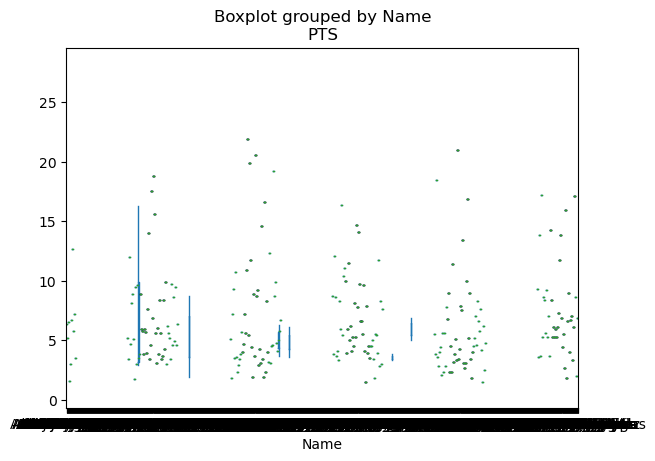

In [32]:
df3.boxplot(by ='Name', column=['PTS'], grid = False)

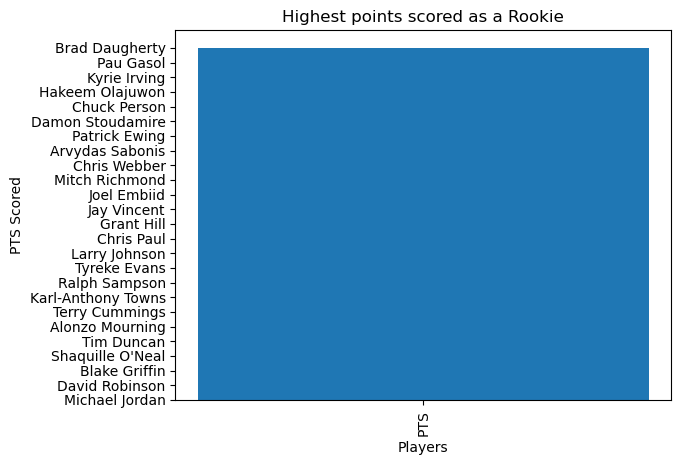

In [33]:
plt.bar('PTS', 'Name', data=df4)
plt.xlabel("Players")
plt.xticks(rotation = 90)
plt.ylabel("PTS Scored")
plt.title("Highest points scored as a Rookie")
plt.show()


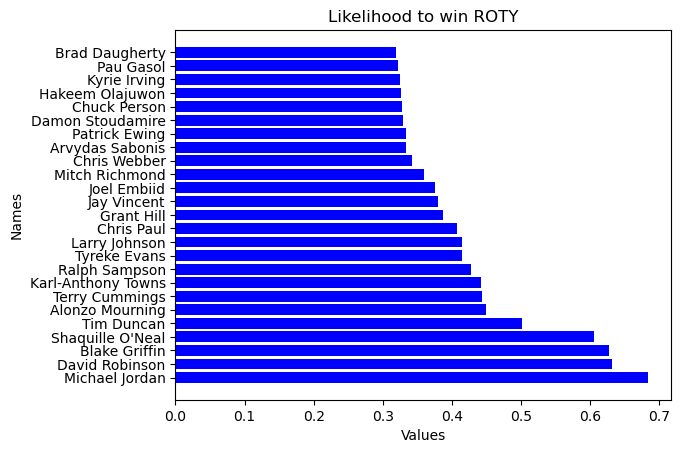

In [34]:
fig, ax = plt.subplots()
ax.barh(df4['Name'], df4['fitted'], color = 'blue')
plt.title('Likelihood to win ROTY')
plt.xlabel('Values')
plt.ylabel('Names')
plt.show()

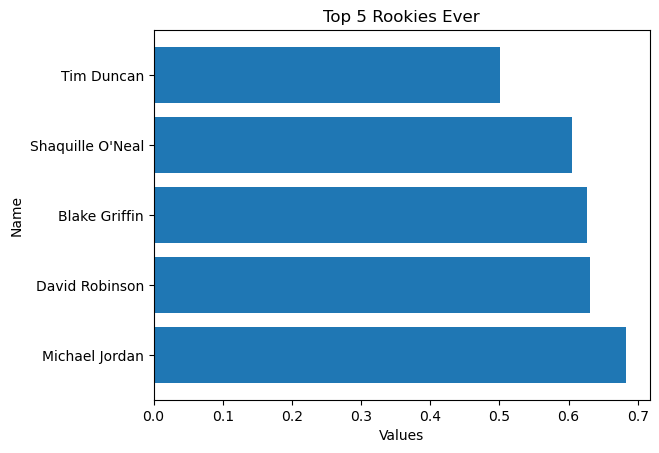

In [35]:
# Replace 'column_name' with the name of the column you want to plot
top_5 = df4.nlargest(5, 'fitted')

# Create the bar graph
plt.barh(top_5['Name'], top_5['fitted'])

# Customize the plot
plt.title('Top 5 Rookies Ever')
plt.xlabel('Values')
plt.ylabel('Name')

# Show the plot
plt.show()


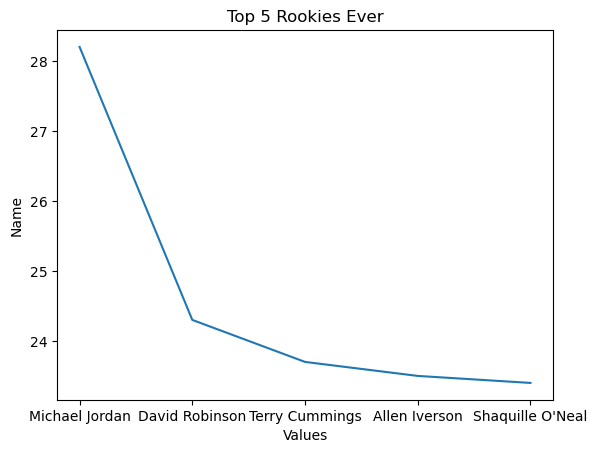

In [36]:
# Replace 'column_name' with the name of the column you want to plot
top_5 = df3.nlargest(5, 'PTS')

# Create the bar graph
plt.plot(top_5['Name'], top_5['PTS'])

# Customize the plot
plt.title('Top 5 Rookies Ever')
plt.xlabel('Values')
plt.ylabel('Name')

# Show the plot
plt.show()


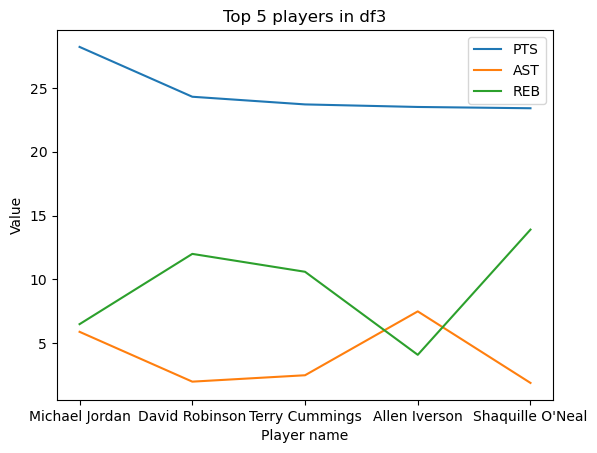

In [37]:
import matplotlib.pyplot as plt

# Sort the DataFrame by multiple columns and select the top 5 rows
top_5 = df3.sort_values(['PTS', 'AST', 'REB'], ascending=False).head(5)

# Create the line chart with multiple lines
plt.plot(top_5['Name'], top_5['PTS'], label='PTS')
plt.plot(top_5['Name'], top_5['AST'], label='AST')
plt.plot(top_5['Name'], top_5['REB'], label='REB')

# Customize the plot
plt.title('Top 5 players in df3')
plt.xlabel('Player name')
plt.ylabel('Value')
plt.legend()

# Show the plot
plt.show()


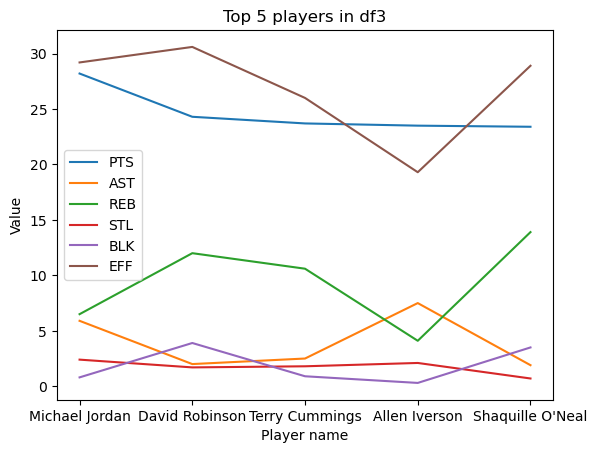

In [38]:
import matplotlib.pyplot as plt

# Sort the DataFrame by multiple columns and select the top 5 rows
top_5 = df3.sort_values(['PTS', 'AST', 'REB', 'STL', 'BLK', 'EFF'], ascending=False).head(5)

# Create the line chart with multiple lines
plt.plot(top_5['Name'], top_5['PTS'], label='PTS')
plt.plot(top_5['Name'], top_5['AST'], label='AST')
plt.plot(top_5['Name'], top_5['REB'], label='REB')
plt.plot(top_5['Name'], top_5['STL'], label='STL')
plt.plot(top_5['Name'], top_5['BLK'], label='BLK')
plt.plot(top_5['Name'], top_5['EFF'], label='EFF')

# Customize the plot
plt.title('Top 5 players in df3')
plt.xlabel('Player name')
plt.ylabel('Value')
plt.legend()

# Show the plot
plt.show()


In [39]:
# as we can tell from the line chart above PTS scored and EFF have a very high impact on who would win ROTY

In [40]:
df3.head()

index             Name  Year Drafted    GP   MIN   PTS  FGM   FGA   FG%  \
0      0   Brandon Ingram        2016.0  36.0  27.4   7.4  2.6   7.6  34.7   
1      1  Andrew Harrison        2016.0  35.0  26.9   7.2  2.0   6.7  29.6   
2      2  Rodney McGruder        2016.0  30.0  25.7   5.8  2.1   5.3  40.0   
3      3      Joel Embiid        2016.0  22.0  24.8  18.9  6.2  13.4  46.4   
4      4      Dario Saric        2016.0  32.0  24.1   9.5  3.5   9.0  38.7   

   3P Made  ...  OREB DREB  REB  AST  STL  BLK  TOV   EFF  roy    fitted  
0      0.5  ...   0.7  3.4  4.1  1.9  0.4  0.4  1.3   7.3  0.0  0.028320  
1      0.7  ...   0.5  2.0  2.4  3.7  1.1  0.5  1.6   7.9  0.0  0.030911  
2      0.8  ...   1.5  2.0  3.5  1.5  0.7  0.3  0.7   7.5  0.0 -0.072345  
3      1.2  ...   2.0  5.4  7.3  1.9  0.8  2.4  3.8  18.8  0.0  0.375360  
4      1.3  ...   1.2  4.7  5.9  1.7  0.5  0.2  1.8  10.1  0.0  0.091624  

[5 rows x 25 columns]

In [46]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1538 entries, 0 to 1537
Data columns (total 25 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         1538 non-null   int64  
 1   Name          1538 non-null   object 
 2   Year Drafted  1538 non-null   float64
 3   GP            1538 non-null   float64
 4   MIN           1538 non-null   float64
 5   PTS           1538 non-null   float64
 6   FGM           1538 non-null   float64
 7   FGA           1538 non-null   float64
 8   FG%           1538 non-null   float64
 9   3P Made       1538 non-null   float64
 10  3PA           1538 non-null   float64
 11  3P%           1538 non-null   object 
 12  FTM           1538 non-null   float64
 13  FTA           1538 non-null   float64
 14  FT%           1538 non-null   float64
 15  OREB          1538 non-null   float64
 16  DREB          1538 non-null   float64
 17  REB           1538 non-null   float64
 18  AST           1538 non-null 

In [74]:
x1 = df3[['GP',  'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3P Made', '3PA', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'EFF']]
y = df3['fitted']

In [75]:
x = sm.add_constant(x1)

In [76]:
results = sm.OLS(y,x).fit()

In [79]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 fitted   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.171e+05
Date:                Fri, 05 May 2023   Prob (F-statistic):               0.00
Time:                        13:24:15   Log-Likelihood:                 7636.4
No. Observations:                1538   AIC:                        -1.523e+04
Df Residuals:                    1519   BIC:                        -1.513e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3344      0.001    438.624      0.000       0.333       0.336
GP            -0.0007   3.19e-06   -232.417      0.000      -0.001      -0.001
MIN           -0.0107   2.05e-05   -521.787      0.000      -0.011      -0.011
PTS           -0.0166      0.001    -25.995      0.000      -0.018      -0.015
FGM           -0.0396      0.001    -33.229      0.000      -0.042      -0.037
FGA            0.0308      0.000    139.732      0.000       0.030       0.031
FG%           -0.0055   1.35e-05   -405.930      0.000      -0.005      -0.005
3P Made       -0.0276      0.001    -31.740      0.000      -0.029      -0.026
3PA           -0.0011      0.000     -4.088      0.000      -0.002      -0.001
FTM           -0.0843      0.001   -124.608      0.000      -0.086      -0.083
FTA            0.0763      0.000    227.030      0.000       0.076       0.077
FT%           -0.0012   6.29e-06   -198.127      0.000      -0.001      -0.001
OREB          -0.0646      0.001    -74.661      0.000      -0.066      -0.063
DREB           0.0081      0.001      9.484      0.000       0.006       0.010
REB           -0.0408      0.001    -47.139      0.000      -0.043      -0.039
AST           -0.0286      0.000   -208.997      0.000      -0.029      -0.028
STL           -0.1072      0.000   -426.028      0.000      -0.108      -0.107
BLK           -0.0600      0.000   -295.273      0.000      -0.060      -0.060
EFF            0.0773      0.000    479.966      0.000       0.077       0.078
==============================================================================
Omnibus:                        4.131   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.127   Jarque-Bera (JB):                3.495
Skew:                          -0.017   Prob(JB):                        0.174
Kurtosis:                       2.769   Cond. No.                     3.82e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.82e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""